# Import and Clean Dataset

In [41]:
import csv
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
psych_csv = Path("psyco.csv")
df = pd.read_csv(psych_csv)

df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [3]:
# Clean incorrectly coded age range
def age_modification(age_range):
    if 'Dec-18' in age_range:
        return "0-18"
    else:
        return age_range

df['age'] = df['age'].apply(age_modification)
    
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [4]:
# Change the binary columns into usable data

# Loop through the rows to recode the values
def recode_hw(value):
    # Specify conditions and recoding mappings
    conditions = [11, 101, 111, 1001, 1011, 1101, 1111]
    recoding_mappings = [10, 100, 110, 1000, 1010, 1100, 1110]

    if value in conditions:
        return recoding_mappings[conditions.index(value)]
    else:
        return value

# Apply to the binary columns
df['recoded_like_hw'] = df['like_hw'].apply(recode_hw)
df['recoded_dislike_hw'] = df['dislike_hw'].apply(recode_hw)

df


,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work,recoded_like_hw,recoded_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN,100,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN,1110,1110
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN,1100,110
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN,100,1110
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN,1010,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,...,0.0,10,1,Complete Physical Attendance,Yes,NaN,9,NaN,10,1
1171,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,...,-0.5,100,111,Complete Physical Attendance,Maybe,NaN,5,NaN,100,110
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,...,0.0,1111,110,Complete Physical Attendance,Maybe,NaN,9,NaN,1110,110
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,...,-0.5,1111,1100,Complete Physical Attendance,Yes,NaN,11,NaN,1110,1100


In [5]:
# Ensure the values were recoded correctly and both columns have the same values 
likehw_unique_values = np.sort(df['recoded_like_hw'].unique())
dislikehw_unique_values = np.sort(df['recoded_dislike_hw'].unique())

print(f'The values in the sorted_like_hw column are {likehw_unique_values}')
print(f'The values in the sorted_dislike_hw column are {dislikehw_unique_values}')

The values in the sorted_like_hw column are [   1   10  100  110 1000 1010 1100 1110]
The values in the sorted_dislike_hw column are [   1   10  100  110 1000 1010 1100 1110]


In [6]:
# As there are 8 unique values, convert values into a 8-point scale for easier interpretation
scale_mapping = {
    1: 1,
    10: 2,
    100: 3,
    110: 4,
    1000: 5,
    1010: 6,
    1100: 7,
    1110: 8
}

df['scaled_like_hw'] = df['recoded_like_hw'].map(scale_mapping)
df['scaled_dislike_hw'] = df['recoded_dislike_hw'].map(scale_mapping)

df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work,recoded_like_hw,recoded_dislike_hw,scaled_like_hw,scaled_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1,Complete Physical Attendance,Yes,NaN,7,NaN,100,1,3,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1110,Complete Physical Attendance,No,NaN,7,NaN,1110,1110,8,8
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,111,Complete Physical Attendance,Yes,NaN,7,NaN,1100,110,7,4
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,1111,Complete Physical Attendance,Yes,NaN,7,NaN,100,1110,3,8
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,1000,Complete Physical Attendance,Yes,NaN,7,NaN,1010,1000,6,5


In [7]:
# Drop binary columns, recoded columns, and custom data columns 
df = df.drop(columns=["like_hw", "dislike_hw", "recoded_like_hw", "recoded_dislike_hw", "Unnamed: 19", "time_bp.1", "travel+work"])
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,scaled_like_hw,scaled_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,Complete Physical Attendance,Yes,3,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,Complete Physical Attendance,No,8,8
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,Complete Physical Attendance,Yes,7,4
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,Complete Physical Attendance,Yes,3,8
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,Complete Physical Attendance,Yes,6,5


## Describing the Data

In [8]:
# Determine sample size

num_rows = df.shape[0]
print(f'The sample size is n = {num_rows}')

The sample size is n = 1175


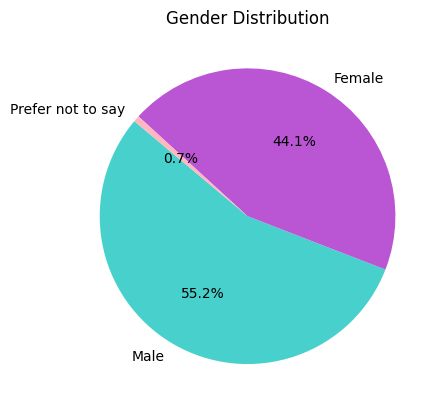

<Figure size 640x480 with 0 Axes>

In [44]:
# Determine gender distribution of dataset with piechart

gender_counts = df['gender'].value_counts()
colors = ['mediumturquoise', 'mediumorchid', 'lightpink']

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender Distribution')
plt.show()

# save figure to images folder
folder_path = 'images'  
filename = 'gender_distribution.png'
file_path = os.path.join(folder_path, filename)
plt.savefig(file_path)

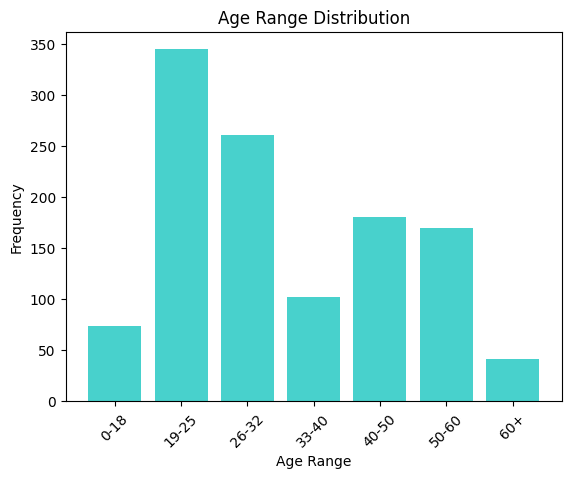

<Figure size 640x480 with 0 Axes>

In [45]:
# Determine age distribution of dataset

age_counts = df['age'].value_counts()
age_counts_sorted = age_counts.sort_index()

plt.bar(age_counts_sorted.index, age_counts_sorted.values, color='mediumturquoise')
plt.title('Age Range Distribution')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Save figure to images folder
folder_path = 'images'  
filename = 'age_distribution.png'
file_path = os.path.join(folder_path, filename)
plt.savefig(file_path)

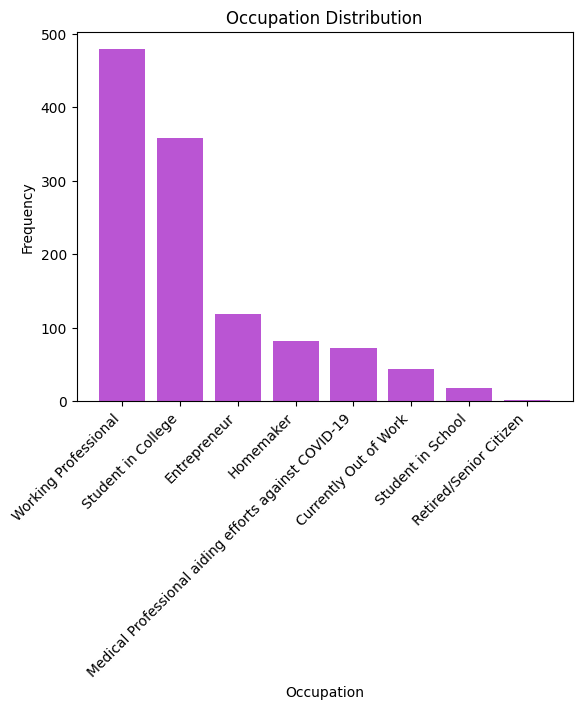

<Figure size 640x480 with 0 Axes>

In [46]:
# Determine the occupation/education distribution of the dataset

occupation_counts = df['occupation'].value_counts()

plt.bar(occupation_counts.index, occupation_counts.values, color="mediumorchid")
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  
plt.show()

# save figure to images folder
folder_path = 'images'  
filename = 'occ_distribution.png'
file_path = os.path.join(folder_path, filename)
plt.savefig(file_path)

## Does self-rated sleep cycle quality affect productivity increase?

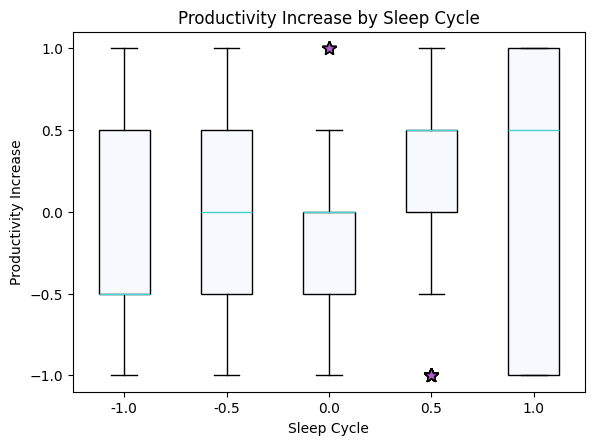

<Figure size 640x480 with 0 Axes>

In [47]:
# Use boxplot to compare productivity increase distributions across self-reported sleep cycle scores

df.boxplot(by='sleep_bal', column=['prod_inc'],
            patch_artist=True,
            boxprops=dict(facecolor='ghostwhite'),
            whiskerprops=dict(color='k'),
            capprops=dict(color='k'),
            medianprops=dict(color='mediumturquoise'),
            flierprops=dict(markerfacecolor='mediumorchid', marker='*', markersize=10, linestyle='none'))
plt.title('Productivity Increase by Sleep Cycle')
plt.suptitle('') 
plt.xlabel('Sleep Cycle')
plt.ylabel('Productivity Increase')
plt.yticks([-1.0, -0.5, 0, 0.5, 1])
plt.grid(False)
plt.show()

# Save figure to images
folder_path = 'images'  
filename = 'prod_by_sleep.png'
file_path = os.path.join(folder_path, filename)
plt.savefig(file_path)

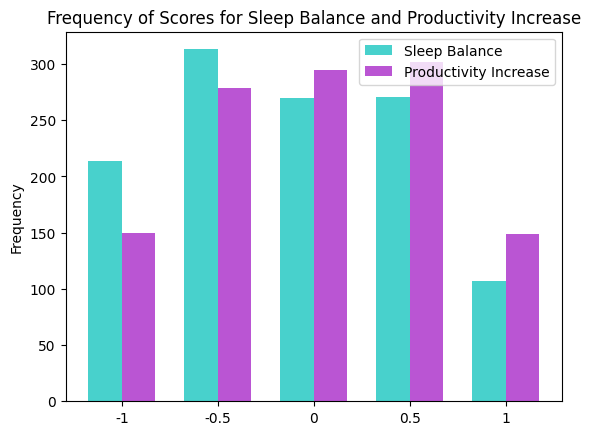

In [49]:
# Use a bar graph to compare median sleep cycle and median productivity increase

# freq_sleep_bal = df['sleep_bal'].value_counts().sort_index()
# freq_prod_inc = df['prod_inc'].value_counts().sort_index()

# scores = [-1, -0.5, 0, 0.5, 1]
# freq_sleep_bal = freq_sleep_bal.reindex(scores, fill_value=0)
# freq_prod_inc = freq_prod_inc.reindex(scores, fill_value=0)

# x = np.arange(len(scores))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# bars1 = ax.bar(x - width/2, freq_sleep_bal, width, label='Sleep Balance', color='mediumturquoise')
# bars2 = ax.bar(x + width/2, freq_prod_inc, width, label='Productivity Increase', color='mediumorchid')

# ax.set_ylabel('Frequency')
# ax.set_title('Frequency of Scores for Sleep Balance and Productivity Increase')
# ax.set_xticks(x)
# ax.set_xticklabels(scores)
# ax.legend()

# plt.show()